In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam, SGLBO

## PQC

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


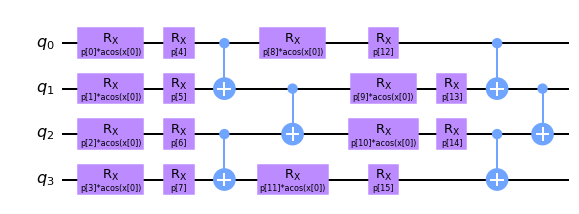

In [2]:
executor = Executor("qasm_simulator")
executor.set_shots(5000)

nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

## Observable

In [3]:
op = SummedPaulis(nqubits)
print(op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


In [4]:
def sigmoid(x, a, b, c):
    return 1 / (1 + np.exp(-a * (x - b) / c))

In [5]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.random.rand(op.num_parameters)

qnn_simulator_adam = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    Adam({"lr": 0.001,"log_file": "adam_sigmoid_noise_lr_0.001.log", "maxiter": 300}),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

x_train = np.arange(-1, 1.1, 0.1)
y_train = sigmoid(x_train, 5, 0, 1)

qnn_simulator_adam.fit(x_train, y_train)

fit: 100%|██████████| 300/300 [1:17:11<00:00, 15.78s/it]

In [6]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.random.rand(op.num_parameters)

qnn_simulator_adam = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    Adam({"lr": 0.01,"log_file": "adam_sigmoid_noise_lr_0.01.log", "maxiter": 300}),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

x_train = np.arange(-1, 1.1, 0.1)
y_train = sigmoid(x_train, 5, 0, 1)

qnn_simulator_adam.fit(x_train, y_train)

fit: 100%|██████████| 300/300 [1:17:14<00:00, 15.45s/it]
total_shots 1201095000
total_shots 1205085000
total_shots 1209075000
total_shots 1213065000
total_shots 1217055000
total_shots 1221045000
total_shots 1225035000
total_shots 1229025000
total_shots 1233015000
total_shots 1237005000
total_shots 1240995000
total_shots 1244985000
total_shots 1248975000
total_shots 1252965000
total_shots 1256955000
total_shots 1260945000
total_shots 1264935000
total_shots 1268925000
total_shots 1272915000
total_shots 1276905000
total_shots 1280895000
total_shots 1284885000
total_shots 1288875000
total_shots 1292865000
total_shots 1296855000
total_shots 1300845000
total_shots 1304835000
total_shots 1308825000
total_shots 1312815000
total_shots 1316805000
total_shots 1320795000
total_shots 1324785000
total_shots 1328775000
total_shots 1332765000
total_shots 1336755000
total_shots 1340745000
total_shots 1344735000
total_shots 1348725000
total_shots 1352715000
total_shots 1356705000
total_shots 1360695000


In [7]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.random.rand(op.num_parameters)

qnn_simulator_adam = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    Adam({"lr": 0.1,"log_file": "adam_sigmoid_noise_lr_0.1.log", "maxiter": 300}),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True,
    parameter_seed=124
)

x_train = np.arange(-1, 1.1, 0.1)
y_train = sigmoid(x_train, 5, 0, 1)

qnn_simulator_adam.fit(x_train, y_train)

fit: 100%|██████████| 300/300 [1:20:38<00:00, 16.13s/it]
total_shots 2398200000
fit: 100%|██████████| 300/300 [1:19:45<00:00, 13.79s/it]